In [2]:
#%pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2f/0e/3b74e8f7c908082793adafb02753477f653ccd7e189f3ba070757d2d0e65/pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for numpy>=1.22.4 from https://files.pythonhosted.org/packages/9b/5a/f265a1ba3641d16b5480a217a6aed08cceef09cd173b568cd5351053472a/numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-20

In [9]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,index,home_team,away_team,home_goals,away_goals,result,season
0,0,Sheffield United,Liverpool,1,1,D,2006-2007
1,252,Manchester City,Reading,0,2,A,2006-2007
2,251,Fulham,Newcastle United,2,1,H,2006-2007
3,250,Charlton Athletic,Chelsea,0,1,A,2006-2007
4,249,Blackburn Rovers,Sheffield United,2,1,H,2006-2007
...,...,...,...,...,...,...,...
4555,18,Liverpool,West Ham United,2,1,H,?
4556,8,Manchester United,Fulham,5,1,H,?
4557,2,Everton,Watford,2,1,H,?
4558,161,Portsmouth,Everton,2,0,H,?


#### Data Cleaning
Remove invalid values from the season column

In [10]:
df.loc[df['season'] == '?', 'season'] = 'Unknown season'
df.head()

,index,home_team,away_team,home_goals,away_goals,result,season
0,0,Sheffield United,Liverpool,1,1,D,2006-2007
1,252,Manchester City,Reading,0,2,A,2006-2007
2,251,Fulham,Newcastle United,2,1,H,2006-2007
3,250,Charlton Athletic,Chelsea,0,1,A,2006-2007
4,249,Blackburn Rovers,Sheffield United,2,1,H,2006-2007


#### Identify invalid values in goals scored

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       4560 non-null   int64 
 1   home_team   4560 non-null   object
 2   away_team   4560 non-null   object
 3   home_goals  4560 non-null   int64 
 4   away_goals  4560 non-null   int64 
 5   result      4560 non-null   object
 6   season      4560 non-null   object
dtypes: int64(3), object(4)
memory usage: 249.5+ KB


In [14]:
#%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b5/24/aaccf324ce862bb82277e8814d2aebbb2a2c160d04e95aa2b8c9dc3137a9/matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f1/6b/e4b0f8708f22dd7c321f87eadbb98708975e115ac6582eb46d1f32197ce6/contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ac/ed/9a33eca5e2cc35dc1fea0a968509c653db9a99a5979656ae57c6c019d66b/fonttools-4.43.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
import matplotlib

<Axes: ylabel='Frequency'>

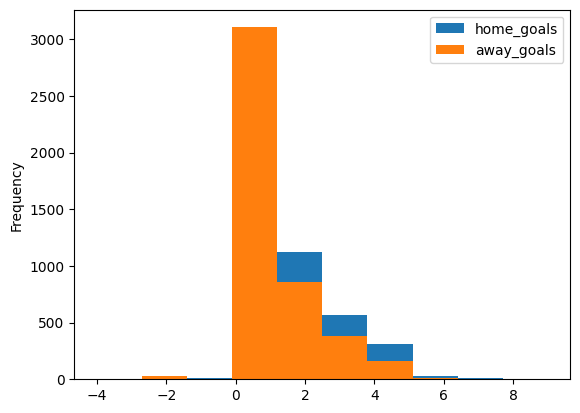

In [16]:
df[['home_goals','away_goals']].plot(kind='hist')

<Axes: >

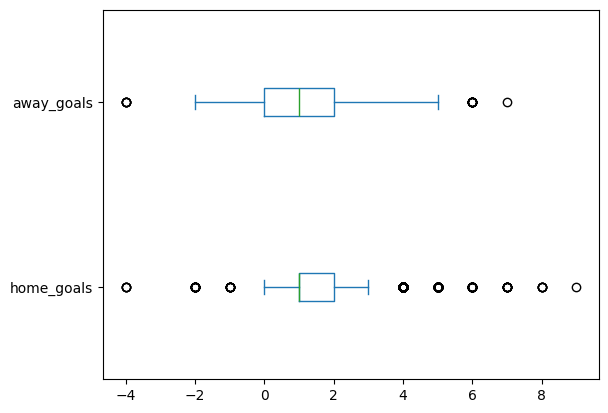

In [17]:
df[['home_goals','away_goals']].plot(kind='box',vert=False)

In [18]:
(df['home_goals'] < 0).sum()
(df['away_goals'] < 0).sum()
(df['away_goals'] < 0).sum()

39

#### Replace invalid goals for 0

In [19]:
df.loc[df['home_goals'] < 0, 'home_goals'] = 0
df.loc[df['away_goals'] < 0, 'away_goals'] = 0

#### Identify and clean invalid results in the result column


In [20]:
df['result'].value_counts()

result
H    2088
A    1278
D    1151
?      43
Name: count, dtype: int64

In [21]:
df.loc[df['home_goals'] > df['away_goals'],'result'] = 'H' 
df.loc[df['home_goals'] < df['away_goals'],'result'] = 'A'
df.loc[df['home_goals'] == df['away_goals'],'result'] = 'D'

In [22]:
df['result'].value_counts()

result
H    2107
A    1294
D    1159
Name: count, dtype: int64

#### What's the average number of goals per match?

In [23]:
df['Check'] = df['home_goals'] + df['away_goals']

In [24]:
df['Check'].mean()

2.6633771929824563

In [25]:
## another way

(df['home_goals'] + df['away_goals']).mean()

2.6633771929824563

In [26]:
## drop check columns
df = df.drop(columns= 'Check')


#### Create a new column total_goals

In [27]:
df['total_goals'] = df['home_goals'] + df['away_goals']
df

,index,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,252,Manchester City,Reading,0,2,A,2006-2007,2
2,251,Fulham,Newcastle United,2,1,H,2006-2007,3
3,250,Charlton Athletic,Chelsea,0,1,A,2006-2007,1
4,249,Blackburn Rovers,Sheffield United,2,1,H,2006-2007,3
...,...,...,...,...,...,...,...,...
4555,18,Liverpool,West Ham United,2,1,H,Unknown season,3
4556,8,Manchester United,Fulham,5,1,H,Unknown season,6
4557,2,Everton,Watford,2,1,H,Unknown season,3
4558,161,Portsmouth,Everton,2,0,H,Unknown season,2


#### Calculate average goals per season

In [28]:
goals_per_season = df.groupby('season')['total_goals'].mean()
goals_per_season

season
2006-2007         2.429799
2007-2008         2.618421
2008-2009         2.463158
2009-2010         2.747368
2010-2011         2.797368
2011-2012         2.763158
2012-2013         2.773684
2013-2014         2.718421
2014-2015         2.500000
2015-2016         2.676316
2016-2017         2.794737
2017-2018         2.678947
Unknown season    2.419355
Name: total_goals, dtype: float64

#### What's the biggest goal difference in a match?


In [29]:
(df['home_goals'] - df['away_goals']).abs().sort_values(ascending=False).head()


3245    8
1473    8
2318    8
1243    8
2979    7
dtype: int64

#### What's the team with most away wins?

In [30]:
df.groupby('away_team').apply(lambda rows: (rows['result'] == 'A').sum()).sort_values(ascending=False).head()


away_team
Chelsea              120
Manchester United    117
Arsenal              103
Manchester City       98
Liverpool             98
dtype: int64

#### What's the team with the most goals scored at home?

In [31]:
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head()

home_team
Manchester City      499
Manchester United    495
Chelsea              488
Arsenal              471
Liverpool            459
Name: home_goals, dtype: int64

#### What's the team that received the least amount of goals while playing at home?


In [35]:
away_goals_df = df.groupby('home_team')[['result', 'away_goals']].agg(
    {'result': 'size', 'away_goals': 'sum'}
).sort_values(
    by=['result', 'away_goals'], ascending=[False, True]
).rename(columns={'result': 'games_played', 'away_goals': 'goals_received'})
away_goals_df.head()

,games_played,goals_received
home_team,,
Manchester United,228,158
Liverpool,228,180
Arsenal,228,183
Chelsea,228,183
Manchester City,228,186


#### What's the team with most goals scored playing as a visitor (away from home)?

In [36]:
away_goals_df = df.groupby('away_team')[['result', 'away_goals']].agg(
    {'result': 'size', 'away_goals': 'sum'}
).sort_values(
    by=['result', 'away_goals'], ascending=[False, False]
).rename(columns={'result': 'games_played', 'away_goals': 'goals_scored'})
away_goals_df.head()

,games_played,goals_scored
away_team,,
Arsenal,228,379
Manchester United,228,366
Manchester City,228,359
Chelsea,228,357
Liverpool,228,348
